<a href="https://colab.research.google.com/github/parthibanAIML/parthi/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:

# Load your dataset
data = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")
df = data.copy()
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)




In [ ]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Exited']).values, df.Exited.values, test_size=0.2, random_state=42)

In [ ]:
# Function to train and evaluate models
def result_grid(x_train, y_train, x_test, y_test):
    # Model parameter grid
    model_param_grid = {
        'Logistic Regression': (LogisticRegression(max_iter=10000), {'C': [0.01, 0.1, 1, 10.0],
                                                                     'solver': ['liblinear','lbfgs','newton-cg']}),
        'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35]}),
        'Decision Tree': (DecisionTreeClassifier(max_depth=10), {'criterion': ['gini','entropy'],
                                                                  'splitter': ['best','random'],
                                                                  'max_depth': [10,50,100,150,200,250,300,350,400]}),
        'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 150, 200]})
    }

    results = []

    for name, (model, parameters) in model_param_grid.items():
        grid = GridSearchCV(model, parameters)

        print(f"Tuning for {name}")

        st = time.time()

        grid.fit(x_train, y_train)
        y_pred = grid.predict(x_test)
        acc = accuracy_score(y_test, y_pred)

        en = time.time()

        net_time = en - st


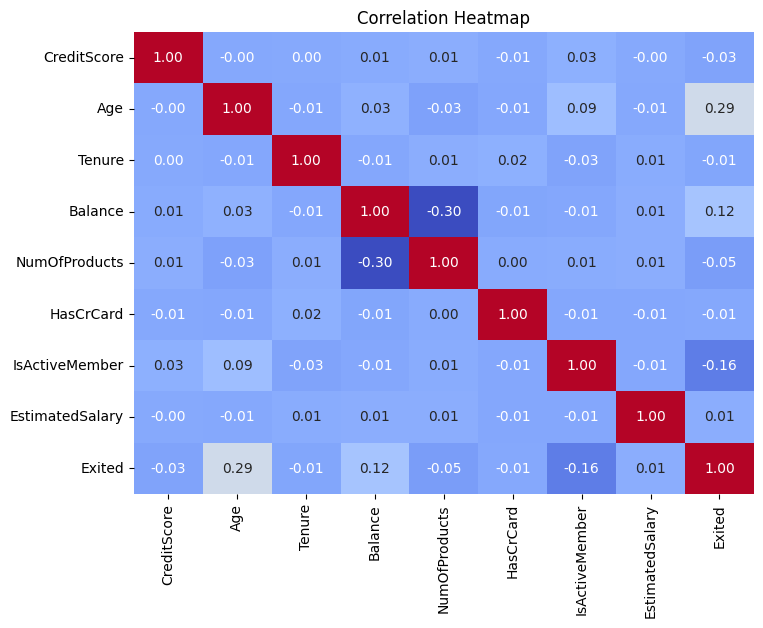

In [ ]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=False)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# label encoding for some categorical features
gender_labels = {'Female':0, 'Male':1}
geography_labels = {'France':0, 'Germany':1, 'Spain':2}
df.Gender = df.Gender.map(gender_labels)
df.Geography = df.Geography.map(geography_labels)

df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:

# Define the list of categorical variables (excluding the 'Exited' column)
cat_columns = df.columns[df.nunique() < 10].tolist()
cat_columns.remove('Exited')


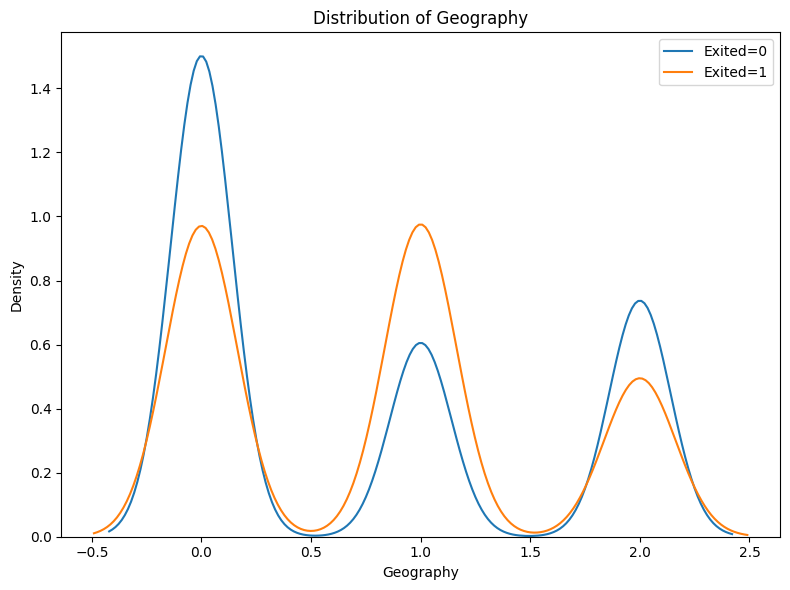

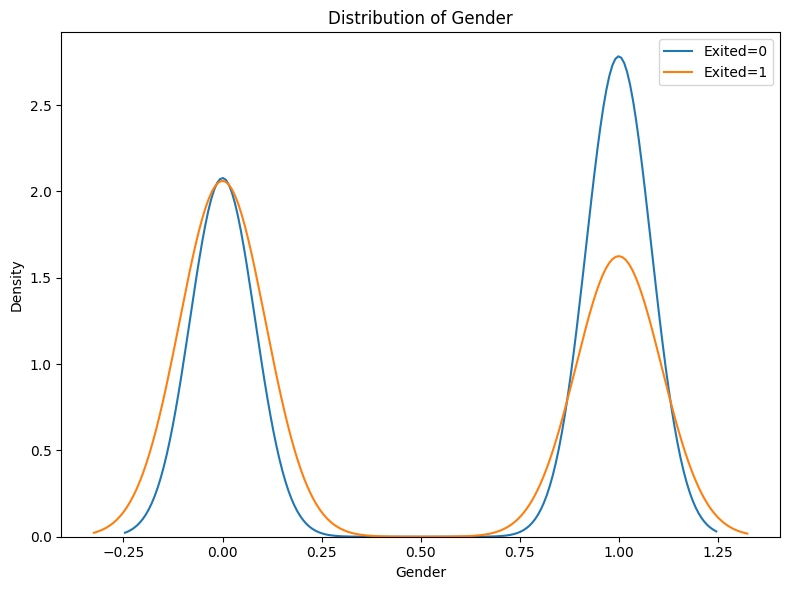

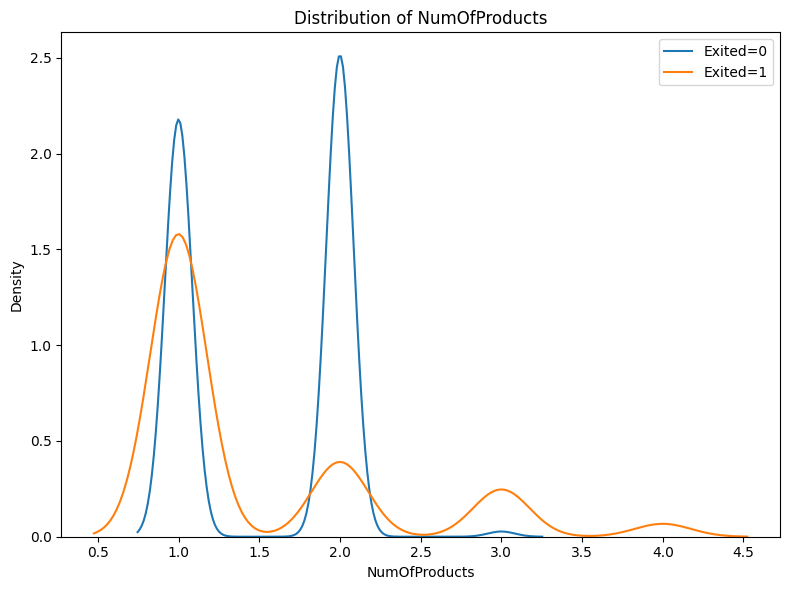

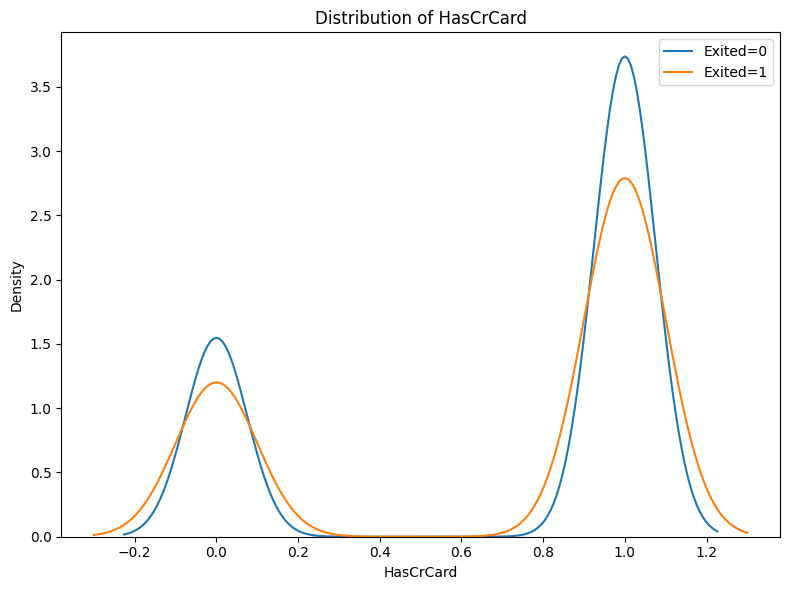

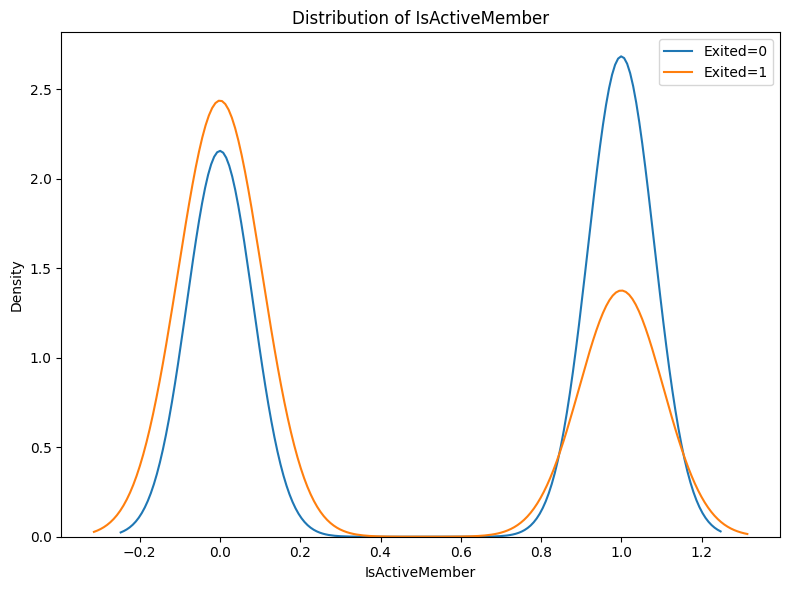

In [ ]:
# Define the list of categorical variables (excluding the 'Exited' column)
cat_columns = df.columns[df.nunique() < 10].tolist()
cat_columns.remove('Exited')

# Iterate through categorical columns and create distribution plots
for factor in cat_columns:
    plt.figure(figsize=(8, 6))  # Create a new figure for each variable
    sns.distplot(df[factor][df['Exited'] == 0], hist=False, label='Exited=0')
    sns.distplot(df[factor][df['Exited'] == 1], hist=False, label='Exited=1')
    plt.title(f'Distribution of {factor}')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Exited']).values, df.Exited.values,test_size=0.2, random_state=42)


In [ ]:
# Define the result_grid function
def result_grid(x_train, y_train, x_test, y_test):
    model_param_grid = {
        'Logistic Regression': (LogisticRegression(max_iter=10000), {
            'C': [0.01, 0.1, 1, 10.0],
            'solver': ['liblinear', 'lbfgs', 'newton-cg']
        }),
        'KNN': (KNeighborsClassifier(), {
            'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35]
        }),
        'Decision Tree': (DecisionTreeClassifier(max_depth=10), {
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'max_depth': [10, 50, 100, 150, 200, 250, 300, 350, 400]
        }),
        'Random Forest': (RandomForestClassifier(), {
            'n_estimators': [50, 100, 150, 200]
        })
    }

    results = []

    for name, (model, parameters) in model_param_grid.items():
        grid = GridSearchCV(model, parameters)

        print(f"Tuning for {name}")

        st = time.time()

        grid.fit(x_train, y_train)  # fitting in GridSearchCV
        y_pred = grid.predict(x_test)  # predicts using best hyperparameters
        acc = accuracy_score(y_test, y_pred)  # best accuracy obtained

        en = time.time()

        net_time = en - st

        # printing best parameters:
        print(f"Best hyperparameters for {name}: {grid.best_params_}")
        print(f"Best obtained score for {name}: {grid.best_score_ * 100:.3f}%")
        print(f"Running time for {name}: {net_time:.3f}s")

        results.append([name, grid.best_params_, grid.best_score_ * 100, net_time])
        print('-' * 100)
        print()

    result_df = pd.DataFrame(results, columns=['model_name', 'best_parameters', 'best_test_score', 'running_time'])
    result_df = result_df.style.highlight_max(subset=['best_test_score'], color='yellow')
    result_df = result_df.highlight_min(subset=['best_test_score'], color='teal')
    result_df = result_df.highlight_max(subset=['running_time'], color='teal')
    result_df = result_df.highlight_min(subset=['running_time'], color='brown')
    return result_df


In [ ]:

# Assuming you have already loaded your dataset and preprocessed it as 'x_train', 'y_train', 'x_test', and 'y_test'
result_summary = result_grid(x_train, y_train, x_test, y_test)

Tuning for Logistic Regression
Best hyperparameters for Logistic Regression: {'C': 10.0, 'solver': 'newton-cg'}
Best obtained score for Logistic Regression: 80.625%
Running time for Logistic Regression: 15.359s
----------------------------------------------------------------------------------------------------

Tuning for KNN
Best hyperparameters for KNN: {'n_neighbors': 31}
Best obtained score for KNN: 79.450%
Running time for KNN: 7.610s
----------------------------------------------------------------------------------------------------

Tuning for Decision Tree
Best hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}
Best obtained score for Decision Tree: 83.825%
Running time for Decision Tree: 3.721s
----------------------------------------------------------------------------------------------------

Tuning for Random Forest
Best hyperparameters for Random Forest: {'n_estimators': 150}
Best obtained score for Random Forest: 86.088%
Runni

In [ ]:
# Display the result summary
result_summary

,model_name,best_parameters,best_test_score,running_time
0,Logistic Regression,"{'C': 10.0, 'solver': 'newton-cg'}",80.625000,15.359373
1,KNN,{'n_neighbors': 31},79.450000,7.610448
2,Decision Tree,"{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}",83.825000,3.720675
3,Random Forest,{'n_estimators': 150},86.087500,22.828135
